## Machine Machine Learning with Multiple Linear Regression

In this project, I will use multiple linear regression to predict the Fuel Used (in Liters) based upon Loaded Travel Distances (in Km), per Empty Travel Distance (Km) and Payload Weight.To test for the effects of interactions on the significance of any one variable in a linear regression model a technique known as step-wise regression. I will be Using step-wise regression you add or remove variables from the model and assess the statistical significance of each variable on the resultant model.

### Importing the Libraries

In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
pd.set_option('display.max_colwidth', -1)

### Dataset

In [192]:
#Load the dataset
dataset = pd.read_csv("../machine/Payload trucks 1_10 updated.csv")
dataset.head()

,MACH_SER_NO,OCUR_TS_Date,OCUR_TS_Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM


In [193]:
dataset.drop(['OCUR_TS_LOCAL', 'OCUR_TS_Time', 
                'OCUR_TS_Date', 'MACH_SER_NO'], axis=1, inplace=True)

In [194]:
dataset

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
0,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0
1,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0
2,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0
3,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0
4,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0
...,...,...,...,...,...,...,...,...,...,...,...
70648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
dataset.isnull().sum()

PAYLD_WT            66249
LD_TM               66249
EMTY_STOP_TM        66249
EMTY_TRAV_TM        66249
EMTY_TRAV_DSTNC     66249
LD_STOP_TM          66249
LD_TRAV_TM          66249
LD_TRAV_DSTNC       66249
LD_PASS_CT          66249
FUEL_USED_IN_CYC    66249
SHFT_CT             66249
dtype: int64

In [196]:
# descriptions
dataset.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,333.875477,181.831290,454.724796,652.557902,3.844460,494.990463,860.663261,4.116894,4.123751,140.974035,93.418256
std,58.505307,109.133516,683.359213,275.309613,1.855567,751.357734,290.729274,1.604505,0.923801,45.905858,30.371788
min,0.000000,4.000000,0.000000,0.000000,0.000000,42.000000,30.000000,0.000000,1.000000,4.258588,2.000000
25%,320.800000,129.000000,54.000000,469.750000,2.400000,73.000000,675.000000,2.800000,4.000000,112.616002,72.000000
50%,344.300000,155.000000,196.000000,635.000000,3.800000,174.500000,845.000000,4.000000,4.000000,137.694355,90.000000
75%,364.425000,202.000000,520.250000,808.000000,5.100000,618.000000,1005.000000,5.200000,5.000000,169.397179,110.000000
max,548.700000,2378.000000,6556.000000,2382.000000,16.000000,9186.000000,3339.000000,16.600000,9.000000,412.136712,244.000000


As you can see from the image above, we have two ‘nan’s, in each columns. We need to calculate the values for these cells. For this example, we’ll be using the strategy ‘mean’ and imputing along the columns, as imputing along the rows makes no sense here. The code for this is as follows:

In [197]:
# imputing the columns
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = impute.fit(dataset)
imp =impute.transform(dataset)

In [198]:
imp

array([[349.7       , 193.        , 454.        , ...,   5.        ,
         77.60094226,  79.        ],
       [336.5       , 323.        ,  99.        , ...,   6.        ,
        177.9143554 ,  73.        ],
       [356.3       , 321.        , 864.        , ...,   4.        ,
        138.1675313 , 100.        ],
       ...,
       [333.87547684, 181.83128974, 454.72479564, ...,   4.12375114,
        140.97403516,  93.41825613],
       [333.87547684, 181.83128974, 454.72479564, ...,   4.12375114,
        140.97403516,  93.41825613],
       [333.87547684, 181.83128974, 454.72479564, ...,   4.12375114,
        140.97403516,  93.41825613]])

- Scaling the Data

If you look at the dataset you'll notice that it is not scaled well. For instance the "EMTY_TRAV_DSTNC" and "SHFT_CT" column have values between 2 and 39, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

In [199]:
#scaling to unit variance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(imp)
scaler_df

array([[0.63732459, 0.07961247, 0.06924954, ..., 0.5       , 0.17981439,
        0.31818182],
       [0.61326772, 0.13437237, 0.01510067, ..., 0.625     , 0.42575406,
        0.29338843],
       [0.64935302, 0.13352991, 0.13178768, ..., 0.375     , 0.32830626,
        0.40495868],
       ...,
       [0.60848456, 0.07490787, 0.0693601 , ..., 0.39046889, 0.33518701,
        0.37776139],
       [0.60848456, 0.07490787, 0.0693601 , ..., 0.39046889, 0.33518701,
        0.37776139],
       [0.60848456, 0.07490787, 0.0693601 , ..., 0.39046889, 0.33518701,
        0.37776139]])

In [200]:
# create Pandas Dataframe
principal = pd.DataFrame(scaler_df 
             , columns = ['PAYLD_WT', 'LD_TM', 'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC',
       'LD_STOP_TM', 'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT',
       'FUEL_USED_IN_CYC', 'SHFT_CT'])

In [201]:
principal

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
0,0.637325,0.079612,0.069250,0.298489,0.225000,0.066273,0.175280,0.168675,0.500000,0.179814,0.318182
1,0.613268,0.134372,0.015101,0.074307,0.037500,0.001531,0.361136,0.409639,0.625000,0.425754,0.293388
2,0.649353,0.133530,0.131788,0.363980,0.356250,0.002078,0.249924,0.277108,0.375000,0.328306,0.404959
3,0.625296,0.150379,0.090604,0.280017,0.287500,0.002297,0.254155,0.277108,0.375000,0.332947,0.400826
4,0.691270,0.090143,0.105095,0.375315,0.400000,0.402778,0.332427,0.265060,0.500000,0.526682,0.417355
...,...,...,...,...,...,...,...,...,...,...,...
70648,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
70649,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
70650,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
70651,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761


### Exploratory Data Analysis

To see statistical details of the dataset, we'll use the describe() command again

In [202]:
principal.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
count,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000,70653.000000
mean,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
std,0.026618,0.011476,0.026021,0.028853,0.028951,0.020513,0.021933,0.024129,0.028827,0.028096,0.031330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
50%,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
75%,0.608485,0.074908,0.069360,0.273954,0.240279,0.049540,0.251032,0.248006,0.390469,0.335187,0.377761
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
principal.isnull().sum()

PAYLD_WT            0
LD_TM               0
EMTY_STOP_TM        0
EMTY_TRAV_TM        0
EMTY_TRAV_DSTNC     0
LD_STOP_TM          0
LD_TRAV_TM          0
LD_TRAV_DSTNC       0
LD_PASS_CT          0
FUEL_USED_IN_CYC    0
SHFT_CT             0
dtype: int64

### Preparing the Data

##### Selecting Features for our Model

Pearson correlation coefficient

In [204]:
#To assess the correlation in this data I will call the corr() method of the Pandas DataFrame objec
principal.corr()[['FUEL_USED_IN_CYC']].sort_values('FUEL_USED_IN_CYC')

,FUEL_USED_IN_CYC
LD_PASS_CT,-0.123988
LD_TM,-0.060620
PAYLD_WT,-0.033612
EMTY_STOP_TM,0.189587
LD_STOP_TM,0.255879
EMTY_TRAV_DSTNC,0.487604
EMTY_TRAV_TM,0.504923
SHFT_CT,0.509525
LD_TRAV_DSTNC,0.655796
LD_TRAV_TM,0.822201


In selecting features to include in this linear regression model, I would like to error on the side of being slightly less permissive in including variables with moderate or lower correlation coefficients. So I will be removing the features that have correlation values less than the absolute value of 0.6. 

With this information, I can now create a new DataFrame that only contains my variables of interest.

In [205]:
predictors = ['LD_TRAV_TM',  'LD_TRAV_DSTNC']
data = principal[['FUEL_USED_IN_CYC'] + predictors]

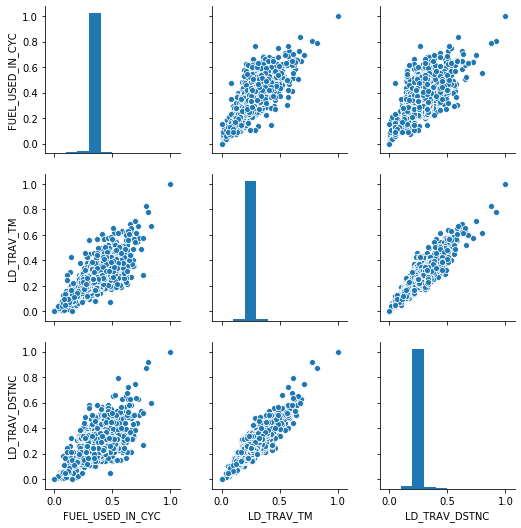

In [206]:
# pairplot matrix
sns.pairplot(data);

From the plots above it is recognizable that all the remaining predictor variables show a good linear relationship with the response variable ("FUEL_USED_IN_CYC"). Additionally, it is also worth noting that the relationships all look uniformly randomly distributed

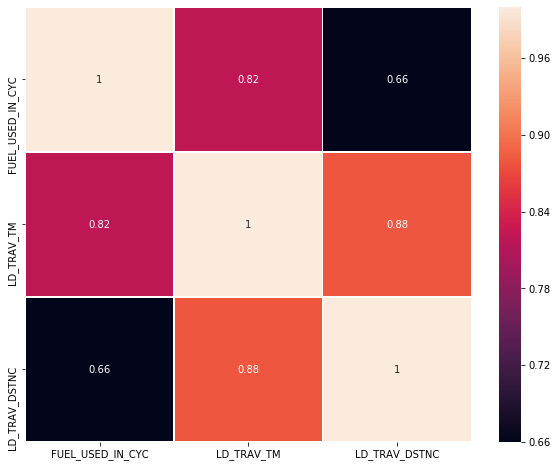

In [207]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

A correlation matrix provides a bit more evidence to the previous graphical analysis. We see that FUEL_USED_IN_CYC and LD_TRAV_TM are perfectly correlated.

#### Create a Validation Dataset

- Preparing the Data
- The next step is to divide the data into attributes and labels
- Divide data into training and test sets

In [208]:
#to split your loaded data into input variables (X) and the output variable (y).
import sklearn
principal = sklearn.utils.shuffle(principal) #Resample to do random permutations of the collections. always shuffle your data to avoid any biases that may emerge b/c of some order.
X = data.drop(["FUEL_USED_IN_CYC"],axis=1)
y = data.FUEL_USED_IN_CYC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [209]:
#Print the split dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56522, 2)
(14131, 2)
(56522,)
(14131,)


In [213]:
# (1) select a significance value
alpha = 0.05
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       FUEL_USED_IN_CYC   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.423e+07
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:11:35   Log-Likelihood:                      1.8872e+05
No. Observations:               70653   AIC:                                 -3.774e+05
Df Residuals:                   70651   BIC:                                 -3.774e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

You can see from the output that all the remaining predictors have a p-values significantly below our Α of 0.05
Two things to note here are (1) the R-squared and Adj. R-squared values are both equal which suggests there is minimal risk that our model is being over fitted by excessive variables and (2) the value of 0.9 is interpreted such that our final model explains about 90% of the observed variation in the outcome variable, the "FUEL_USED_IN_CYC".

In [214]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  LD_TRAV_TM       1.648516
LD_TRAV_DSTNC   -0.319314
dtype: float64
R2:  0.9975235869055764


### Training the Algorithm

In [54]:
# Train the algorithm using fit()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Finds the best value for the intercept and slope

In [55]:
# Retrieve the intercept value
print(regressor.intercept_)

0.07210076661339904


In [56]:
# Retrieving the slope (coefficient of x)
print(regressor.coef_)

[ 1.36203297 -0.31788905]


###  Coefficients of regression model

In [57]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
LD_TRAV_TM,1.362033
LD_TRAV_DSTNC,-0.317889


This means that for a unit increase in "LD_TRAV_DSTNC", there is a decrease of -0.177006 in Km. Similarly, a unit increase in LD_TRAV_TM results in an increase of 1.135279 in second. We can see that "LD_PASS_CT" and "LD_TM" have a very little effect on the Fuel Used.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data

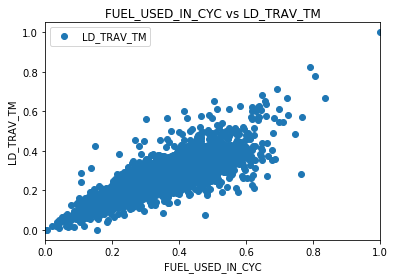

In [58]:
principal.plot( x = "FUEL_USED_IN_CYC", y = "LD_TRAV_TM",style='o')
plt.title("FUEL_USED_IN_CYC vs LD_TRAV_TM")
plt.xlabel("FUEL_USED_IN_CYC")
plt.ylabel("LD_TRAV_TM")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the FUEL_USED_IN_CYC and LD_TRAV_TM.

### Making Predictions

In [59]:
# predictions
y_pred = regressor.predict(X_test)

Compare the actual output values for X_test with the predicted values

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1041,0.365429,0.398023
55950,0.335187,0.335176
42671,0.335187,0.335176
68052,0.335187,0.335176
43760,0.335187,0.335176
...,...,...
58624,0.335187,0.335176
19030,0.335187,0.335176
27360,0.335187,0.335176
15027,0.335187,0.335176


- We can also visualize comparison result as a bar graph using the below script :
- Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

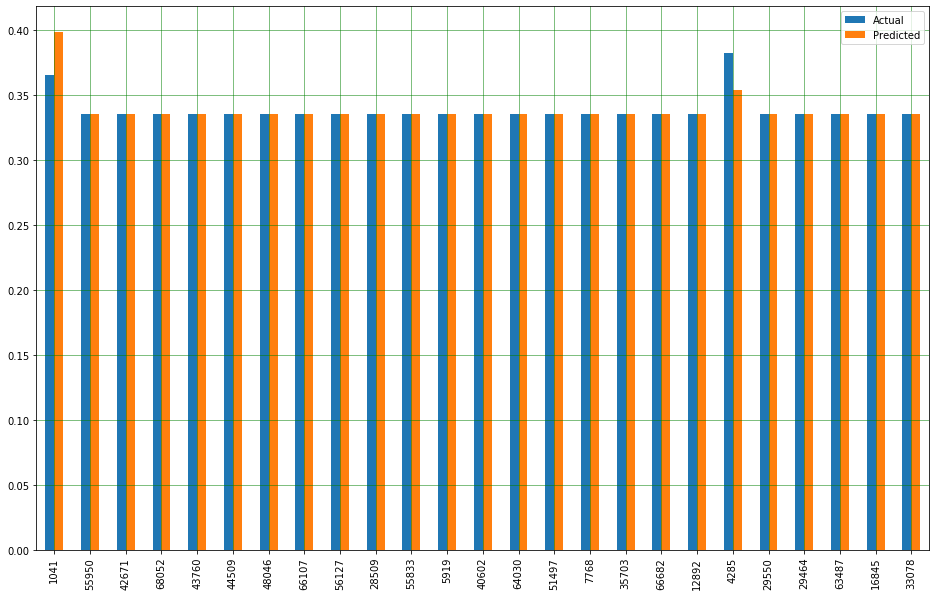

In [61]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

- The predicted percentages are close to the actual ones

### Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE.

In [114]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0028297595113348636
Mean Squared Error: 0.00023387470224704178
Root Mean Squared Error: 0.015292962507213629


You can see that the value of root mean squared error is 0.015 means the difference between actual values and predicted values of my machine learning model.Value of 0.015 for RMSE indicates a perfect fit to the data.